# Comparing plasticity rules

## For every model, meta-learn on 8-dimensional ReLU dataset, then transfer rules, then train / test on the exact same dataset.

Created by Basile Van Hoorick, Fall 2020.

In [1]:
%run FF_common.ipynb

## First, test original RNN as a sanity check.

In [2]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts_up = Options(gd_input=True,
                  use_graph_rule=True,
                  gd_graph_rule=True,
                  use_output_rule=True,
                  gd_output_rule=True,
                  gd_output=False)
opts_down = Options(gd_input=True,
                    use_graph_rule=True,
                    gd_graph_rule=False,  # Not meta-trainable anymore!
                    use_output_rule=True,
                    gd_output_rule=False,  # Not meta-trainable anymore!
                    gd_output=False)
scheme = UpdateScheme(cross_entropy_loss=True,
                      mse_loss=False,
                      update_misclassified_only=False,
                      update_all_edges=True)

# Feed-forward brain config.
n_up = 8  # Input layer size for meta-learning.
n_down = 8  # Input layer size for desired task training.
m = 2  # Output layer size.
l = 2  # Number of hidden layers.
w = 24  # Width of hidden layers.
p = 0.5  # Connectivity probability.
cap = 12  # Number of nodes firing per layer.

# Training config.
num_runs = 10
num_rule_epochs = 30
num_epochs_upstream = 1
num_epochs_downstream = 1

In [3]:
# Instantiate brain factories.
brain_rnn_up_fact = lambda: LocalNet(n_up, m, 100, p, 50, 3, options=opts_up, update_scheme=scheme)
brain_rnn_down_fact = lambda: LocalNet(n_down, m, 100, p, 50, 3, options=opts_down, update_scheme=scheme)

In [4]:
print('==== Original RNN (very different from all the rest) ====')
stats_rnn_up, stats_rnn_down = evaluate_up_down(
    brain_rnn_up_fact, brain_rnn_down_fact, n_up, n_down, dataset='relu',
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

..\DataGenerator.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out2 = F.softmax(torch.matmul(out1, w1))
  0%|                               | 0/30 [00:00<?, ?it/s]

==== Original RNN (very different from all the rest) ====

Run 1 / 10...
Count of 0: 1388  Count of 1: 4612
Meta-learning...


100%|██████████████████████| 30/30 [00:56<00:00,  1.90s/it]
..\LocalNetBase.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.rnn_rule = torch.tensor(rule).flatten().double()
  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4481
Last train accuracy: 0.8987
Last test accuracy: 0.8813
Count of 0: 2301  Count of 1: 3699
Training...
INITIAL train accuracy: 0.6087
INITIAL test accuracy: 0.6191
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.7033
Last train accuracy: 0.6087
Last test accuracy: 0.6191


Run 2 / 10...
Count of 0: 3455  Count of 1: 2545
Meta-learning...


  3%|▌                  | 48/1500 [00:00<00:03, 479.57it/s]

Last loss: 0.4560
Last train accuracy: 0.8133
Last test accuracy: 0.8191
Count of 0: 477  Count of 1: 5523
Training...
INITIAL train accuracy: 0.6007
INITIAL test accuracy: 0.5938
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.3813
Last train accuracy: 0.9240
Last test accuracy: 0.9193


Run 3 / 10...
Count of 0: 868  Count of 1: 5132
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4121
Last train accuracy: 0.9467
Last test accuracy: 0.9342
Count of 0: 4312  Count of 1: 1688
Training...
INITIAL train accuracy: 0.7233
INITIAL test accuracy: 0.7171
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.5793
Last train accuracy: 0.7233
Last test accuracy: 0.7171


Run 4 / 10...
Count of 0: 2738  Count of 1: 3262
Meta-learning...


  3%|▋                  | 52/1500 [00:00<00:02, 514.38it/s]

Last loss: 0.4265
Last train accuracy: 0.8733
Last test accuracy: 0.8653
Count of 0: 1103  Count of 1: 4897
Training...
INITIAL train accuracy: 0.4847
INITIAL test accuracy: 0.4767
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.5453
Last train accuracy: 0.7947
Last test accuracy: 0.8233


Run 5 / 10...
Count of 0: 1277  Count of 1: 4723
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4410
Last train accuracy: 0.8967
Last test accuracy: 0.9062
Count of 0: 1277  Count of 1: 4723
Training...
INITIAL train accuracy: 0.2020
INITIAL test accuracy: 0.2164
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.4858
Last train accuracy: 0.8360
Last test accuracy: 0.8224


Run 6 / 10...
Count of 0: 2911  Count of 1: 3089
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4961
Last train accuracy: 0.8280
Last test accuracy: 0.8022
Count of 0: 3313  Count of 1: 2687
Training...
INITIAL train accuracy: 0.5187
INITIAL test accuracy: 0.5224
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.5273
Last train accuracy: 0.7773
Last test accuracy: 0.7818


Run 7 / 10...
Count of 0: 543  Count of 1: 5457
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.3737
Last train accuracy: 0.9520
Last test accuracy: 0.9489
Count of 0: 3172  Count of 1: 2828
Training...
INITIAL train accuracy: 0.4807
INITIAL test accuracy: 0.4682
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.7613
Last train accuracy: 0.5193
Last test accuracy: 0.5318


Run 8 / 10...
Count of 0: 2201  Count of 1: 3799
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4638
Last train accuracy: 0.8540
Last test accuracy: 0.8587
Count of 0: 4740  Count of 1: 1260
Training...
INITIAL train accuracy: 0.4913
INITIAL test accuracy: 0.4847
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.5293
Last train accuracy: 0.7827
Last test accuracy: 0.7924


Run 9 / 10...
Count of 0: 1809  Count of 1: 4191
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.5076
Last train accuracy: 0.8300
Last test accuracy: 0.8391
Count of 0: 5191  Count of 1: 809
Training...
INITIAL train accuracy: 0.8520
INITIAL test accuracy: 0.8696
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.4433
Last train accuracy: 0.8520
Last test accuracy: 0.8696


Run 10 / 10...
Count of 0: 189  Count of 1: 5811
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.3451
Last train accuracy: 0.9687
Last test accuracy: 0.9684
Count of 0: 1186  Count of 1: 4814
Training...
INITIAL train accuracy: 0.2020
INITIAL test accuracy: 0.1962
Epoch 1 / 1 ...


100%|█████████████████| 1500/1500 [00:03<00:00, 464.55it/s]


Last loss: 0.5333
Last train accuracy: 0.7980
Last test accuracy: 0.8038



Saving figure to: figs/default


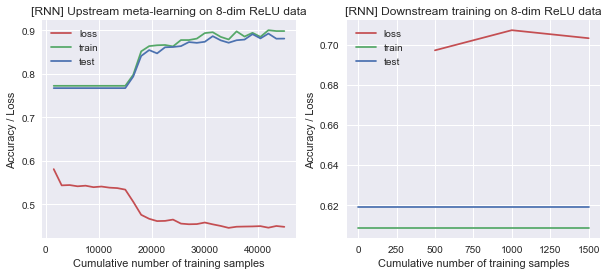

Mean essential stats across all runs:
Last upstream loss: 0.4481
Last upstream train accuracy: 0.8987
Last upstream test accuracy: 0.8813
Last downstream loss: 0.7033
Last downstream train accuracy: 0.6087
Last downstream test accuracy: 0.6191

Saving figure to: figs/default


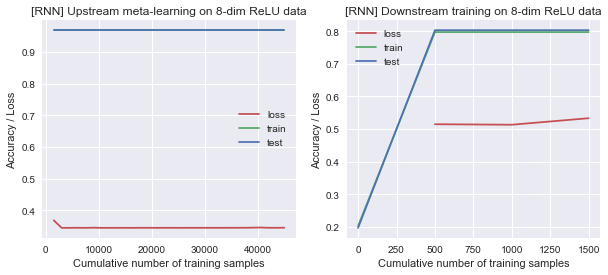

Mean essential stats across all runs:
Last upstream loss: 0.3451
Last upstream train accuracy: 0.9687
Last upstream test accuracy: 0.9684
Last downstream loss: 0.5333
Last downstream train accuracy: 0.7980
Last downstream test accuracy: 0.8038



In [5]:
# Plot FIRST and lAST run stats only.
plot_curves(stats_rnn_up[0], stats_rnn_down[0],
            '[RNN] Upstream meta-learning on ReLU',
            '[RNN] Downstream training on ReLU')
plot_curves(stats_rnn_up[-1], stats_rnn_down[-1],
            '[RNN] Upstream meta-learning on ReLU',
            '[RNN] Downstream training on ReLU')

Saving figure to: figs/comparing_rnn_curves


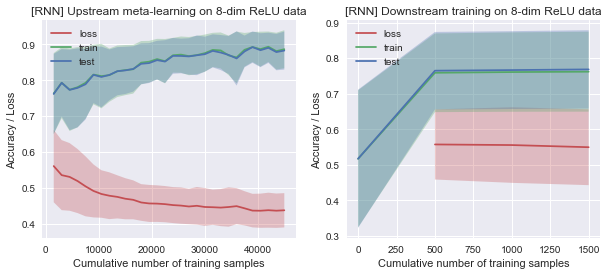

Mean essential stats across all runs:
Last upstream loss: 0.4370
Last upstream train accuracy: 0.8861
Last upstream test accuracy: 0.8824
Last downstream loss: 0.5489
Last downstream train accuracy: 0.7616
Last downstream test accuracy: 0.7681



In [6]:
# Plot aggregated stats.
agg_stats_rnn_up = convert_multi_stats_uncertainty(stats_rnn_up)
agg_stats_rnn_down = convert_multi_stats_uncertainty(stats_rnn_down)
plot_curves(agg_stats_rnn_up, agg_stats_rnn_down,
            '[RNN] Upstream meta-learning on ReLU',
            '[RNN] Downstream training on ReLU',
            'figs/comparing_rnn_curves')

## Evaluate all table-based feed-forward networks.

In [7]:
# Instantiate brain factories.
brain_prepost_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_up, update_scheme=scheme)
brain_prepost_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_down, update_scheme=scheme)
brain_prepostcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_up, update_scheme=scheme)
brain_prepostcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_down, update_scheme=scheme)
brain_prepostpercent_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent(),
    output_rule=TableRule_PrePostPercent(), options=opts_up, update_scheme=scheme)
brain_prepostpercent_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent(),
    output_rule=TableRule_PrePostPercent(), options=opts_down, update_scheme=scheme)
brain_postcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PostCount(),
    output_rule=TableRule_PostCount(), options=opts_up, update_scheme=scheme)
brain_postcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PostCount(),
    output_rule=TableRule_PostCount(), options=opts_down, update_scheme=scheme)

In [8]:
# Evaluate models.
print('==== Interpretation: Pre and Post ====')
stats_prepost_up, stats_prepost_down = evaluate_up_down(
    brain_prepost_up_fact, brain_prepost_down_fact, n_up, n_down, dataset='relu',
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Incoming Count ====')
stats_prepostcount_up, stats_prepostcount_down = evaluate_up_down(
    brain_prepostcount_up_fact, brain_prepostcount_down_fact, n_up, n_down, dataset='relu',
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Binned Incoming Fraction ====')
stats_prepostpercent_up, stats_prepostpercent_down = evaluate_up_down(
    brain_prepostpercent_up_fact, brain_prepostpercent_down_fact, n_up, n_down, dataset='relu',
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Post and Incoming Count ====')
stats_postcount_up, stats_postcount_down = evaluate_up_down(
    brain_postcount_up_fact, brain_postcount_down_fact, n_up, n_down, dataset='relu',
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

..\DataGenerator.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out2 = F.softmax(torch.matmul(out1, w1))
  0%|                               | 0/30 [00:00<?, ?it/s]

==== Interpretation: Pre and Post ====

Run 1 / 10...
Count of 0: 3895  Count of 1: 2105
Meta-learning...


  6%|█                  | 86/1500 [00:00<00:01, 859.22it/s]

Last loss: 0.6931
Last train accuracy: 0.6500
Last test accuracy: 0.6489
Count of 0: 5541  Count of 1: 459
Training...
INITIAL train accuracy: 0.9227
INITIAL test accuracy: 0.9238
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.9227
Last test accuracy: 0.9238


Run 2 / 10...
Count of 0: 999  Count of 1: 5001
Meta-learning...


  6%|█▏                 | 89/1500 [00:00<00:01, 889.18it/s]

Last loss: 0.4183
Last train accuracy: 0.8493
Last test accuracy: 0.8440
Count of 0: 4521  Count of 1: 1479
Training...
INITIAL train accuracy: 0.7553
INITIAL test accuracy: 0.7529
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.5573
Last train accuracy: 0.7553
Last test accuracy: 0.7529


Run 3 / 10...
Count of 0: 2219  Count of 1: 3781
Meta-learning...


  5%|█                  | 79/1500 [00:00<00:01, 789.29it/s]

Last loss: 0.4045
Last train accuracy: 0.9173
Last test accuracy: 0.9051
Count of 0: 4343  Count of 1: 1657
Training...
INITIAL train accuracy: 0.7453
INITIAL test accuracy: 0.7167
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.4892
Last train accuracy: 0.8287
Last test accuracy: 0.8333


Run 4 / 10...
Count of 0: 2595  Count of 1: 3405
Meta-learning...


  6%|█                  | 87/1500 [00:00<00:01, 860.61it/s]

Last loss: 0.4131
Last train accuracy: 0.9060
Last test accuracy: 0.8927
Count of 0: 163  Count of 1: 5837
Training...
INITIAL train accuracy: 0.0280
INITIAL test accuracy: 0.0269
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.3453
Last train accuracy: 0.9700
Last test accuracy: 0.9693


Run 5 / 10...
Count of 0: 1531  Count of 1: 4469
Meta-learning...


  5%|█                  | 80/1500 [00:00<00:01, 799.27it/s]

Last loss: 0.6931
Last train accuracy: 0.2460
Last test accuracy: 0.2582
Count of 0: 2447  Count of 1: 3553
Training...
INITIAL train accuracy: 0.5720
INITIAL test accuracy: 0.5922
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.4253
Last test accuracy: 0.4020


Run 6 / 10...
Count of 0: 4166  Count of 1: 1834
Meta-learning...


  6%|█▏                 | 90/1500 [00:00<00:01, 899.18it/s]

Last loss: 0.4907
Last train accuracy: 0.7107
Last test accuracy: 0.6889
Count of 0: 6000  Count of 1: 0
Training...
INITIAL train accuracy: 0.0000
INITIAL test accuracy: 0.0000
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.3133
Last train accuracy: 1.0000
Last test accuracy: 1.0000


Run 7 / 10...
Count of 0: 1861  Count of 1: 4139
Meta-learning...


  6%|█▏                 | 89/1500 [00:00<00:01, 889.19it/s]

Last loss: 0.4537
Last train accuracy: 0.8607
Last test accuracy: 0.8627
Count of 0: 3970  Count of 1: 2030
Training...
INITIAL train accuracy: 0.6620
INITIAL test accuracy: 0.6616
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.5474
Last train accuracy: 0.7533
Last test accuracy: 0.7487


Run 8 / 10...
Count of 0: 1674  Count of 1: 4326
Meta-learning...


  6%|█▏                 | 94/1500 [00:00<00:01, 939.15it/s]

Last loss: 0.6931
Last train accuracy: 0.2833
Last test accuracy: 0.2776
Count of 0: 3833  Count of 1: 2167
Training...
INITIAL train accuracy: 0.6580
INITIAL test accuracy: 0.6324
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.6580
Last test accuracy: 0.6324


Run 9 / 10...
Count of 0: 1864  Count of 1: 4136
Meta-learning...


  5%|█                  | 81/1500 [00:00<00:01, 809.27it/s]

Last loss: 0.4971
Last train accuracy: 0.7247
Last test accuracy: 0.6796
Count of 0: 5399  Count of 1: 601
Training...
INITIAL train accuracy: 0.9027
INITIAL test accuracy: 0.8989
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.3973
Last train accuracy: 0.9027
Last test accuracy: 0.8989


Run 10 / 10...
Count of 0: 5148  Count of 1: 852
Meta-learning...


  5%|█                  | 82/1500 [00:00<00:01, 819.25it/s]

Last loss: 0.4039
Last train accuracy: 0.8607
Last test accuracy: 0.8571
Count of 0: 2900  Count of 1: 3100
Training...
INITIAL train accuracy: 0.4900
INITIAL test accuracy: 0.5256
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.7161
Last train accuracy: 0.5100
Last test accuracy: 0.4744

==== Interpretation: Pre and Post and Incoming Count ====

Run 1 / 10...
Count of 0: 2533  Count of 1: 3467
Meta-learning...


  6%|█                  | 83/1500 [00:00<00:01, 829.24it/s]

Last loss: 0.5536
Last train accuracy: 0.5800
Last test accuracy: 0.5836
Count of 0: 4073  Count of 1: 1927
Training...
INITIAL train accuracy: 0.6787
INITIAL test accuracy: 0.6789
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.6433
Last train accuracy: 0.6787
Last test accuracy: 0.6789


Run 2 / 10...
Count of 0: 1168  Count of 1: 4832
Meta-learning...


  5%|▉                  | 78/1500 [00:00<00:01, 779.28it/s]

Last loss: 0.4500
Last train accuracy: 0.8200
Last test accuracy: 0.8180
Count of 0: 597  Count of 1: 5403
Training...
INITIAL train accuracy: 0.1007
INITIAL test accuracy: 0.0991
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.4113
Last train accuracy: 0.8993
Last test accuracy: 0.9009


Run 3 / 10...
Count of 0: 2534  Count of 1: 3466
Meta-learning...


  6%|█                  | 84/1500 [00:00<00:01, 839.24it/s]

Last loss: 0.4998
Last train accuracy: 0.7960
Last test accuracy: 0.7971
Count of 0: 4001  Count of 1: 1999
Training...
INITIAL train accuracy: 0.6580
INITIAL test accuracy: 0.6698
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.5694
Last train accuracy: 0.7527
Last test accuracy: 0.7647


Run 4 / 10...
Count of 0: 3503  Count of 1: 2497
Meta-learning...


  5%|▉                  | 77/1500 [00:00<00:01, 769.30it/s]

Last loss: 0.5841
Last train accuracy: 0.5947
Last test accuracy: 0.5802
Count of 0: 5227  Count of 1: 773
Training...
INITIAL train accuracy: 0.8640
INITIAL test accuracy: 0.8736
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.4693
Last train accuracy: 0.8640
Last test accuracy: 0.8736


Run 5 / 10...
Count of 0: 4856  Count of 1: 1144
Meta-learning...


  5%|█                  | 79/1500 [00:00<00:01, 789.29it/s]

Last loss: 0.4283
Last train accuracy: 0.8200
Last test accuracy: 0.8058
Count of 0: 5092  Count of 1: 908
Training...
INITIAL train accuracy: 0.1467
INITIAL test accuracy: 0.1529
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.4753
Last train accuracy: 0.8533
Last test accuracy: 0.8471


Run 6 / 10...
Count of 0: 3819  Count of 1: 2181
Meta-learning...


  5%|▉                  | 78/1500 [00:00<00:01, 771.57it/s]

Last loss: 0.5644
Last train accuracy: 0.6347
Last test accuracy: 0.6371
Count of 0: 2540  Count of 1: 3460
Training...
INITIAL train accuracy: 0.4167
INITIAL test accuracy: 0.4256
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.7053
Last train accuracy: 0.5833
Last test accuracy: 0.5744


Run 7 / 10...
Count of 0: 1093  Count of 1: 4907
Meta-learning...


  6%|█                  | 84/1500 [00:00<00:01, 839.24it/s]

Last loss: 0.4311
Last train accuracy: 0.8307
Last test accuracy: 0.8433
Count of 0: 2819  Count of 1: 3181
Training...
INITIAL train accuracy: 0.4653
INITIAL test accuracy: 0.4713
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.7453
Last train accuracy: 0.5347
Last test accuracy: 0.5287


Run 8 / 10...
Count of 0: 77  Count of 1: 5923
Meta-learning...


  6%|█                  | 85/1500 [00:00<00:01, 849.22it/s]

Last loss: 0.3285
Last train accuracy: 0.9867
Last test accuracy: 0.9873
Count of 0: 1785  Count of 1: 4215
Training...
INITIAL train accuracy: 0.7267
INITIAL test accuracy: 0.6944
Epoch 1 / 1 ...


  0%|                               | 0/30 [00:00<?, ?it/s]


Last loss: 0.5853
Last train accuracy: 0.7267
Last test accuracy: 0.6944


Run 9 / 10...
Count of 0: 1935  Count of 1: 4065
Meta-learning...


 33%|███████▎              | 10/30 [00:11<00:22,  1.10s/it]


KeyboardInterrupt: 

In [ ]:
# Plot aggregated stats.
agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
plot_curves(agg_stats_prepost_up, agg_stats_prepost_down,
            '[PrePost] Upstream meta-learning on ReLU',
            '[PrePost] Downstream training on ReLU',
            'figs/comparing_prepost_curves')
agg_stats_prepostcount_up = convert_multi_stats_uncertainty(stats_prepostcount_up)
agg_stats_prepostcount_down = convert_multi_stats_uncertainty(stats_prepostcount_down)
plot_curves(agg_stats_prepostcount_up, agg_stats_prepostcount_down,
            '[PrePostCount] Upstream meta-learning on ReLU',
            '[PrePostCount] Downstream training on ReLU',
            'figs/comparing_prepostcount_curves')
agg_stats_prepostpercent_up = convert_multi_stats_uncertainty(stats_prepostpercent_up)
agg_stats_prepostpercent_down = convert_multi_stats_uncertainty(stats_prepostpercent_down)
plot_curves(agg_stats_prepostpercent_up, agg_stats_prepostpercent_down,
            '[PrePostPercent] Upstream meta-learning on ReLU',
            '[PrePostPercent] Downstream training on ReLU',
            'figs/comparing_prepostpercent_curves')
agg_stats_postcount_up = convert_multi_stats_uncertainty(stats_postcount_up)
agg_stats_postcount_down = convert_multi_stats_uncertainty(stats_postcount_down)
plot_curves(agg_stats_postcount_up, agg_stats_postcount_down,
            '[PostCount] Upstream meta-learning on ReLU',
            '[PostCount] Downstream training on ReLU',
            'figs/comparing_postcount_curves')

In [ ]:
# Plot to compare all.
all_stats_up = [agg_stats_rnn_up, agg_stats_prepost_up, agg_stats_prepostcount_up, agg_stats_prepostpercent_up, agg_stats_postcount_up]
all_stats_down = [agg_stats_rnn_down, agg_stats_prepost_down, agg_stats_prepostcount_down, agg_stats_prepostpercent_down, agg_stats_postcount_down]
labels = ['RNN', 'PrePost', 'PrePostCount', 'PrePostPercent', 'PostCount']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ReLU',
                    'Downstream training on ReLU'
                    'figs/comparing_table')

In [ ]:
if 0:
    agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
    agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
    for i in range(len(stats_prepost_up)):
        plot_curves(stats_prepost_up[i], stats_prepost_down[i],
                    '[PrePost] Upstream meta-learning on ReLU',
                    '[PrePost] Downstream training on ReLU')

## Evaluate all small-ANN-based feed-forward networks.